## Визуализация законов распределений

#### https://matplotlib.org/ - Документация matplotlib
#### https://seaborn.pydata.org/tutorial.html - Документация seaborn
#### https://seaborn.pydata.org/examples/index.html- Галерея графиков

In [1]:
import pandas as pd, numpy as np
np.set_printoptions(formatter={'float': lambda x: '{:,.2f}'.format(x).replace(',', ' ')}) # чтобы печатал красиво
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', ' ')) # чтобы печатал красиво
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Стандартные законы распределения случайных величин

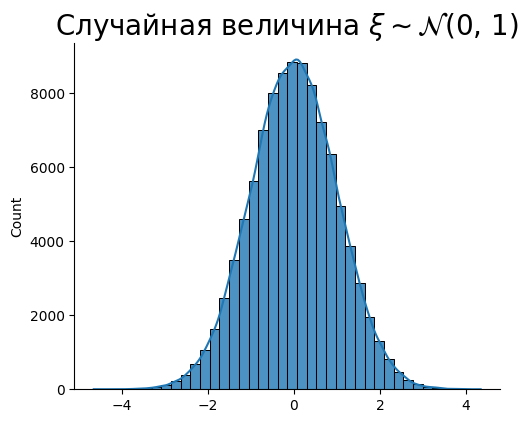

In [12]:
import scipy.stats as sps
sns.displot(sps.norm.rvs(0, 1, size=100_000), bins = 40, height = 4, aspect = 1.3, kde = True, alpha = 0.8);
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20);

Text(0.5, 1.0, 'Случайная величина $\\xi \\sim \\mathcal{N}$(0, 1)')

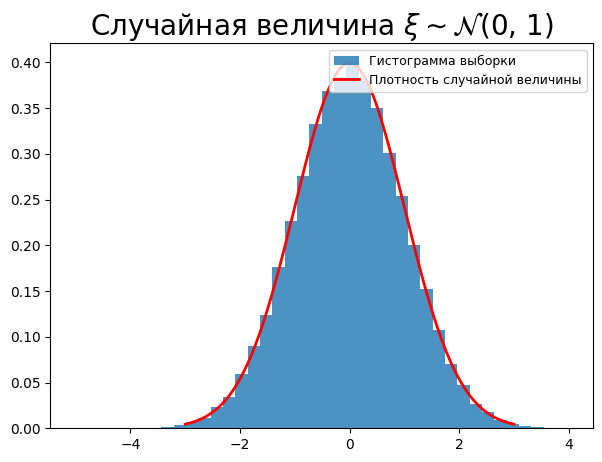

In [26]:
# Построение того же графика на matplotlib
plt.figure(figsize=(7, 5))
plt.hist(sps.norm.rvs(size=100_000), bins=40, density=True, alpha=0.8, label='Гистограмма выборки')
plt.plot(np.linspace(-3, 3, 1000), sps.norm.pdf(np.linspace(-3, 3, 1000)), color='red', lw=2, label='Плотность случайной величины')
plt.legend(fontsize=9, loc=1)
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)

In [ ]:
sns.displot(sps.pareto.rvs(95, 0.5, size=100_000), bins = 50, height = 3.5, aspect = 1.8, kde = True);
plt.title(r'Случайная величина $\xi \sim Pareto$(95, 0.5)', fontsize=20)

#### Задача: Построить одним циклом графики гистограммы с плотностью распределения для всех существующих в библиотеке scipy непрерывных законов распределения случайной величины

In [14]:
# Все непрерывные законы распределения:
print(*(d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous)), sep = ', ')

alpha, anglit, arcsine, argus, beta, betaprime, bradford, burr, burr12, cauchy, chi, chi2, cosine, crystalball, dgamma, dweibull, erlang, expon, exponnorm, exponpow, exponweib, f, fatiguelife, fisk, foldcauchy, foldnorm, gamma, gausshyper, genexpon, genextreme, gengamma, genhalflogistic, genhyperbolic, geninvgauss, genlogistic, gennorm, genpareto, gibrat, gilbrat, gompertz, gumbel_l, gumbel_r, halfcauchy, halfgennorm, halflogistic, halfnorm, hypsecant, invgamma, invgauss, invweibull, johnsonsb, johnsonsu, kappa3, kappa4, ksone, kstwo, kstwobign, laplace, laplace_asymmetric, levy, levy_l, levy_stable, loggamma, logistic, loglaplace, lognorm, loguniform, lomax, maxwell, mielke, moyal, nakagami, ncf, nct, ncx2, norm, norminvgauss, pareto, pearson3, powerlaw, powerlognorm, powernorm, rayleigh, rdist, recipinvgauss, reciprocal, rice, semicircular, skewcauchy, skewnorm, studentized_range, t, trapezoid, trapz, triang, truncexpon, truncnorm, truncpareto, truncweibull_min, tukeylambda, uniform,

In [19]:
par_1 = list(d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous) and eval('sps.' + d + '.numargs') == 1 and not d in ['ksone', 'kstwo'])
par_2 = list(d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous) and eval('sps.' + d + '.numargs') == 2 and d != 'studentized_range')

In [16]:
print(par_1)

['alpha', 'argus', 'bradford', 'chi', 'chi2', 'dgamma', 'dweibull', 'erlang', 'exponnorm', 'exponpow', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'genextreme', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gompertz', 'halfgennorm', 'invgamma', 'invgauss', 'invweibull', 'kappa3', 'ksone', 'laplace_asymmetric', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'nakagami', 'pareto', 'pearson3', 'powerlaw', 'powernorm', 'rdist', 'recipinvgauss', 'rice', 'skewcauchy', 'skewnorm', 't', 'triang', 'truncexpon', 'tukeylambda', 'vonmises', 'vonmises_line', 'weibull_max', 'weibull_min', 'wrapcauchy']


#### Решение:

In [17]:
import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:32<00:00,  1.55it/s]


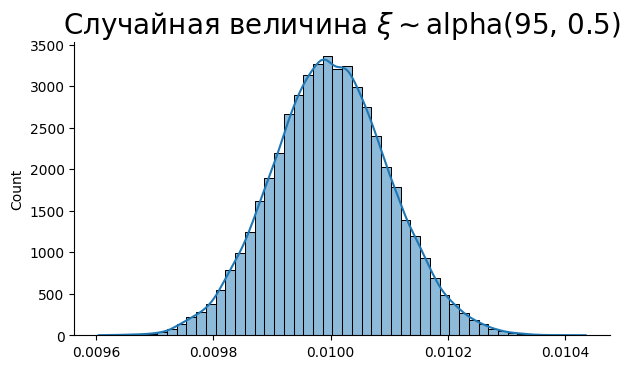

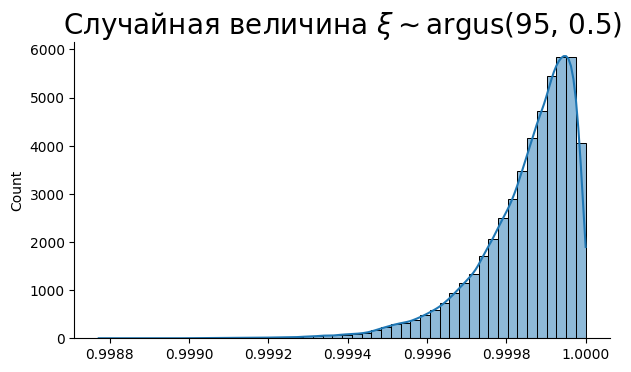

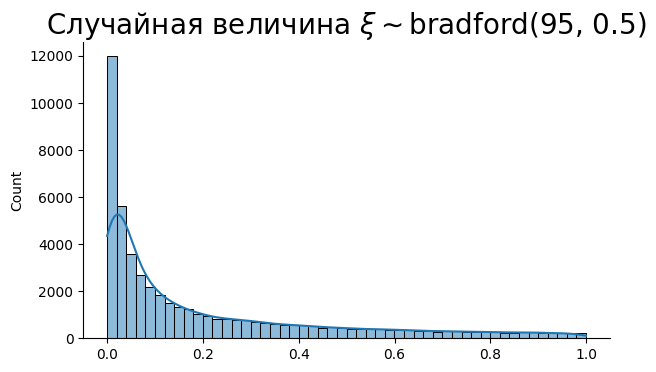

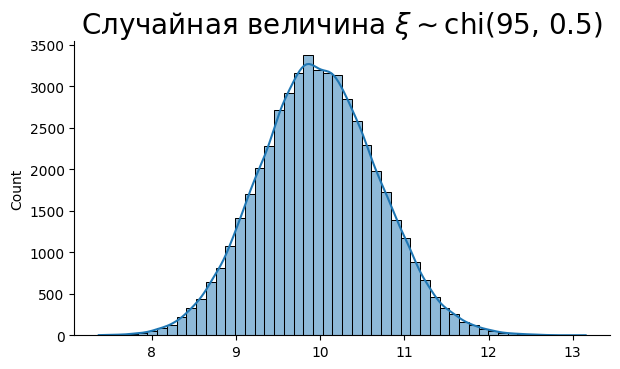

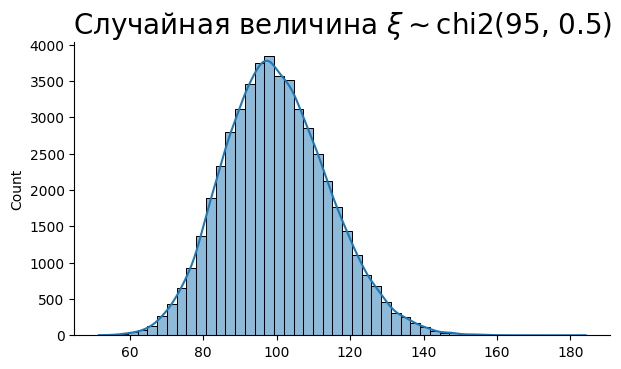

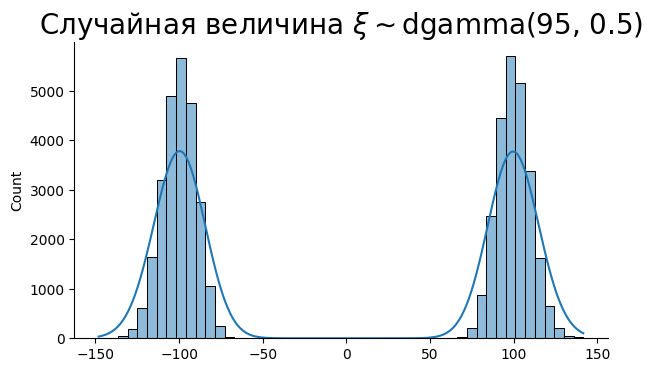

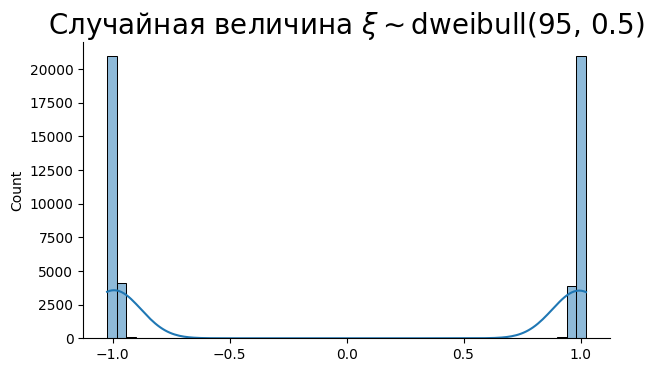

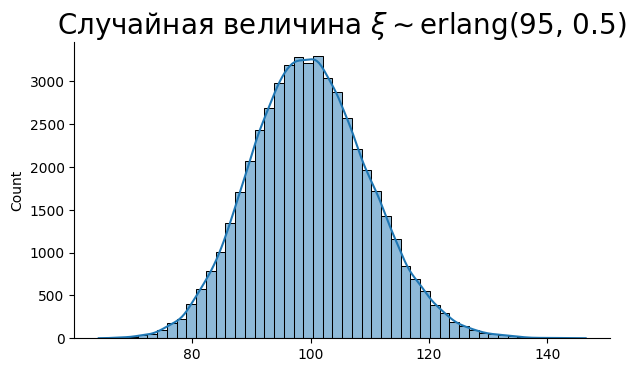

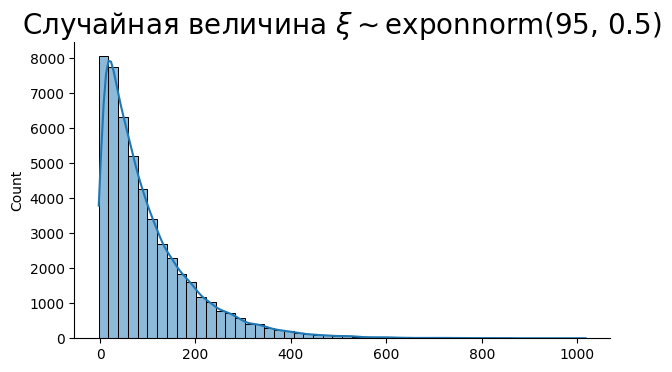

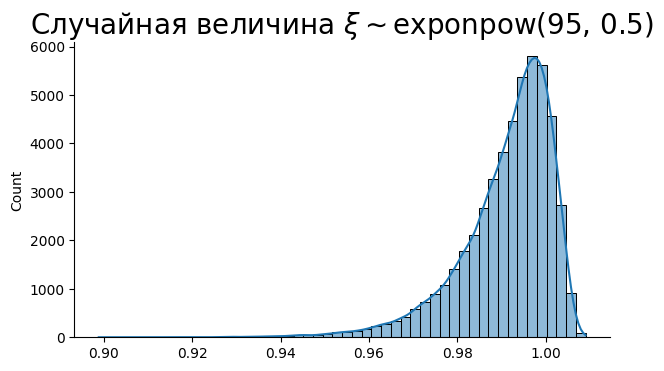

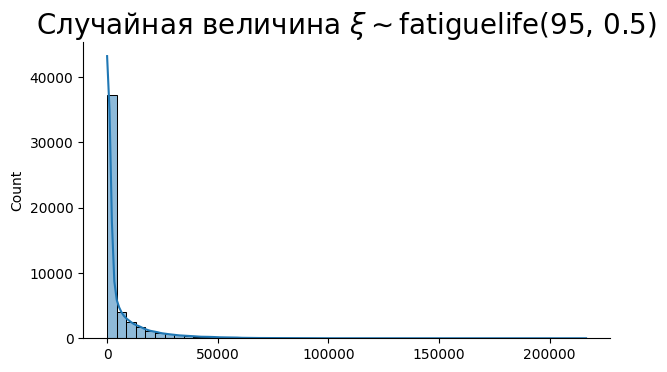

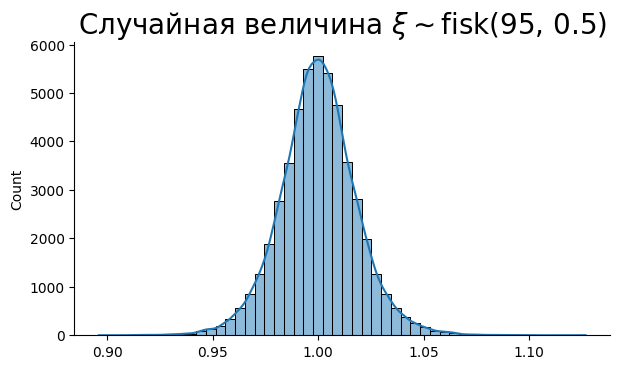

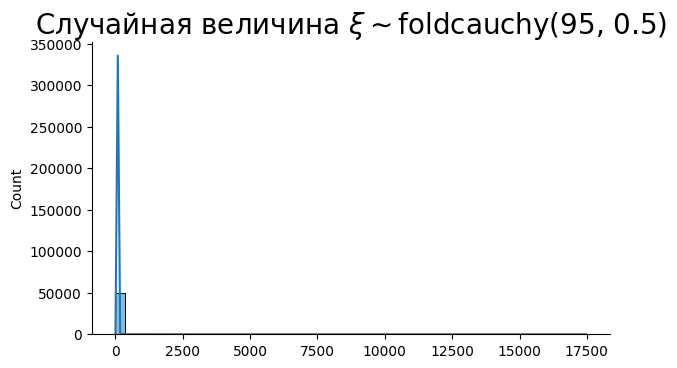

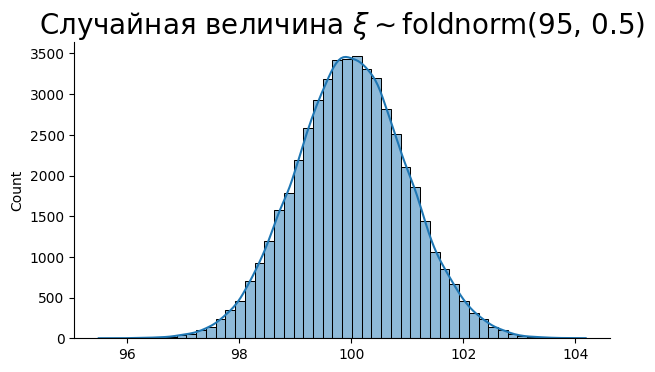

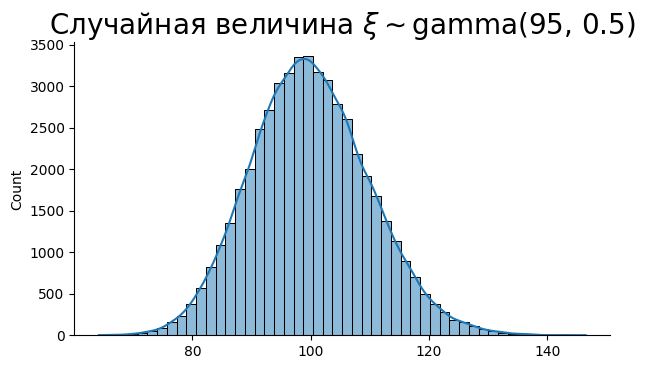

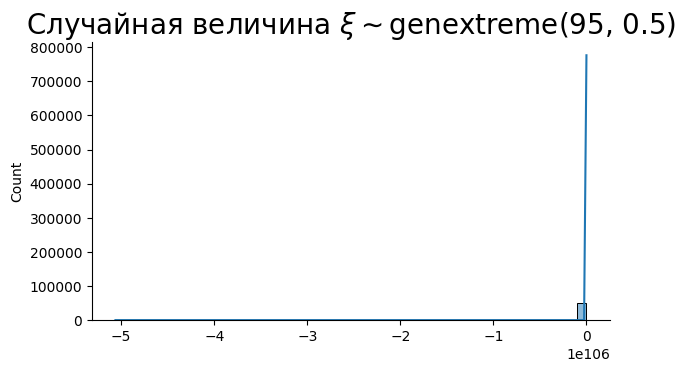

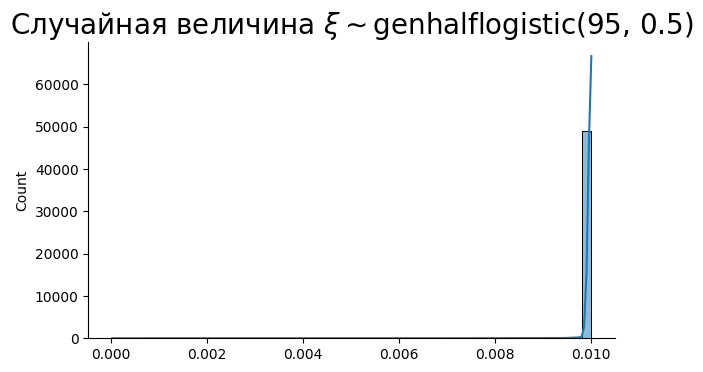

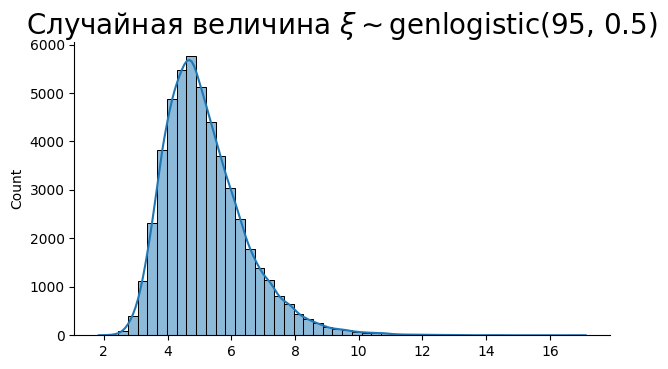

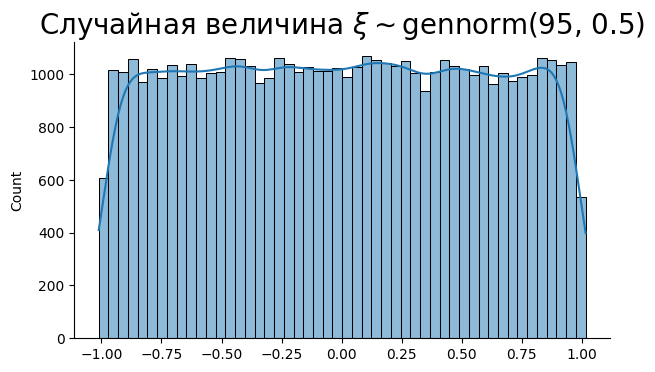

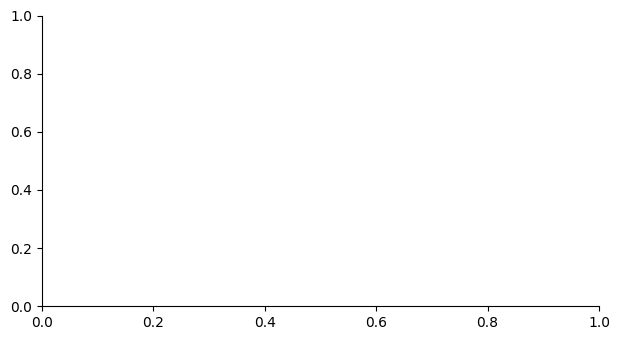

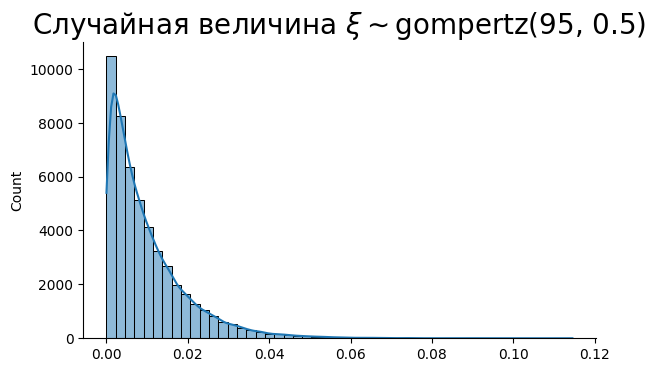

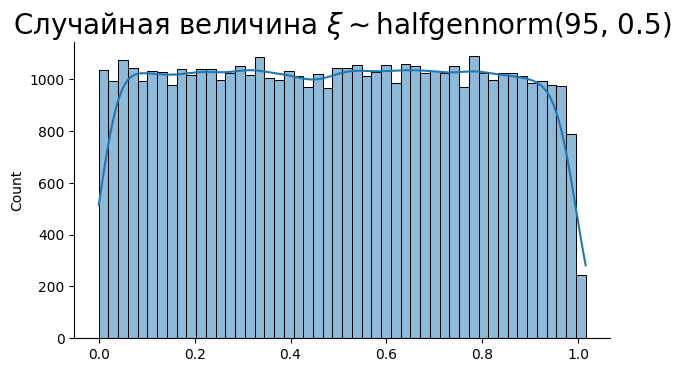

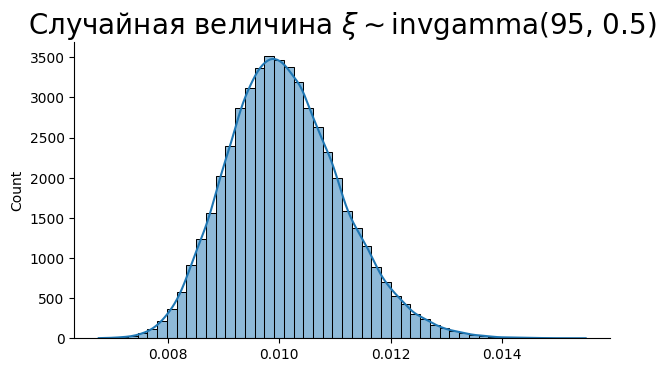

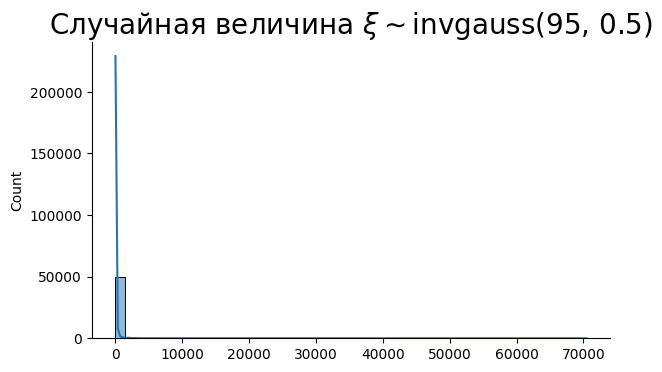

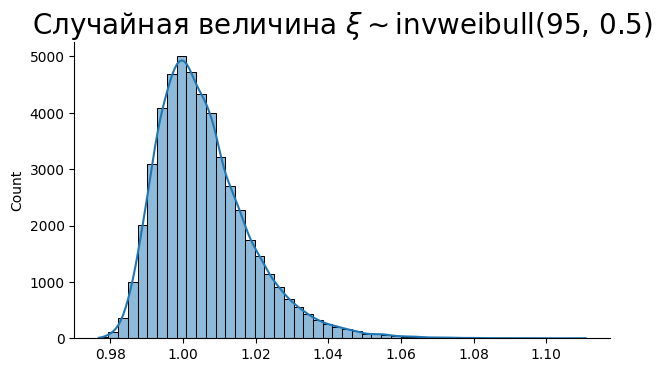

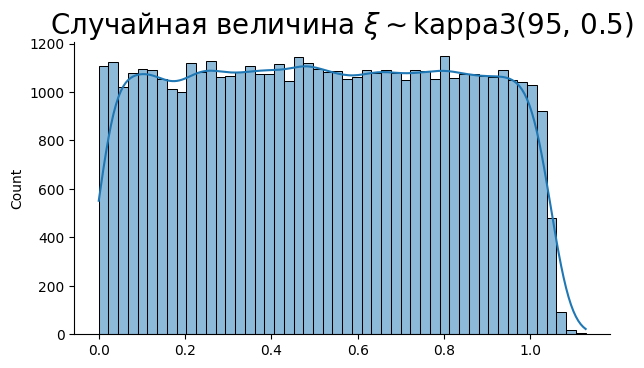

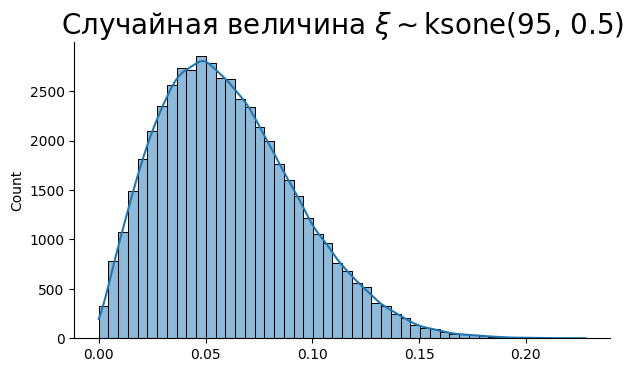

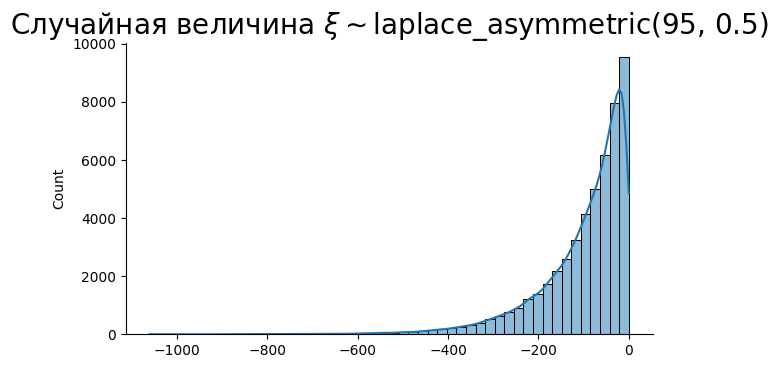

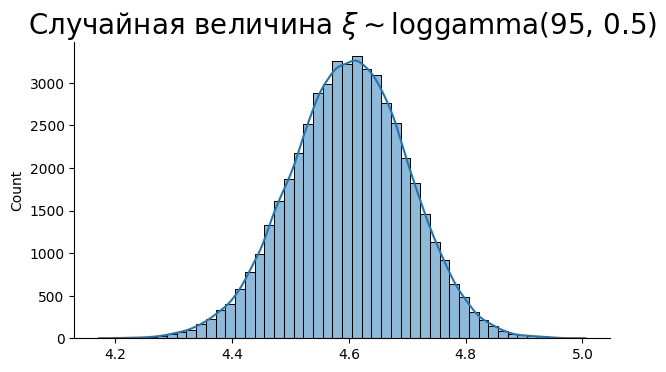

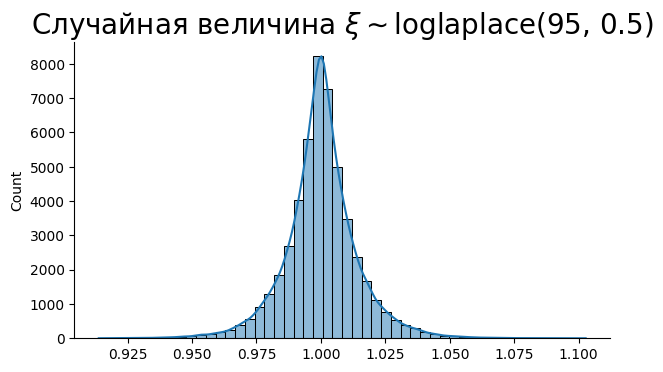

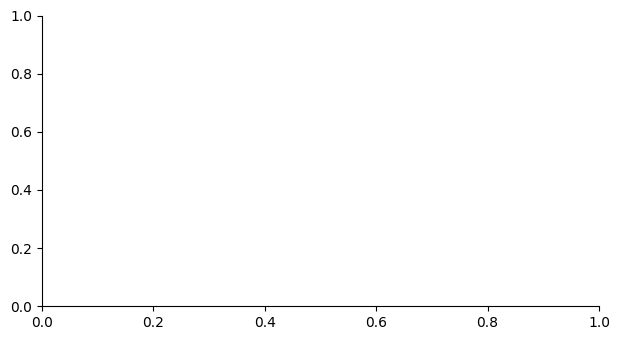

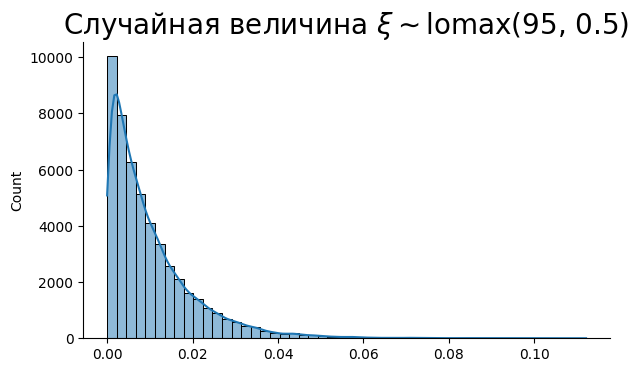

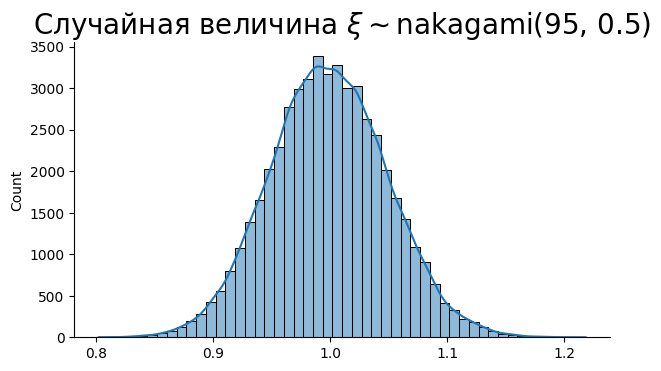

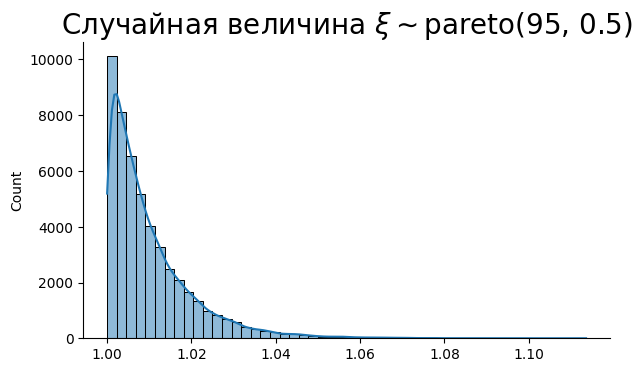

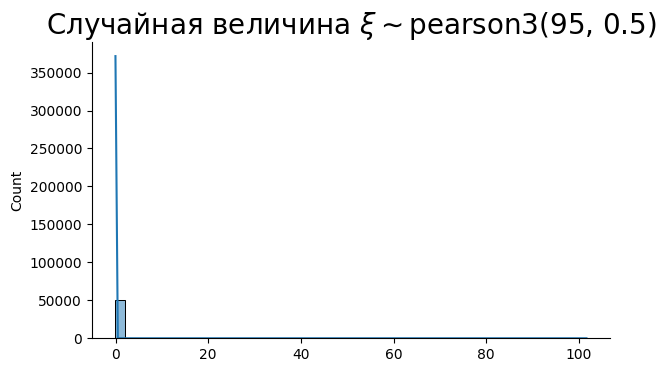

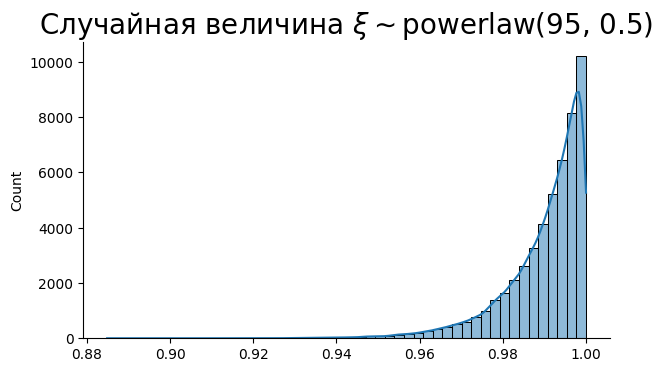

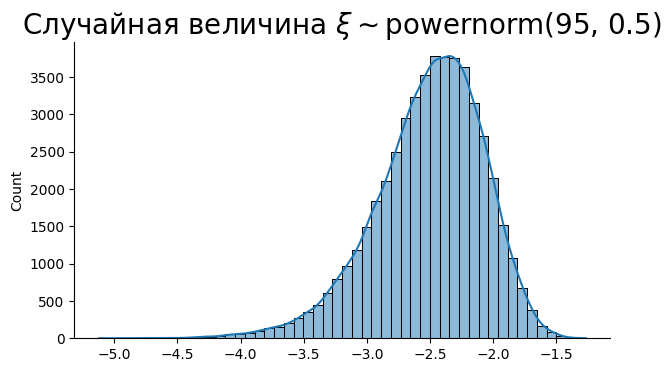

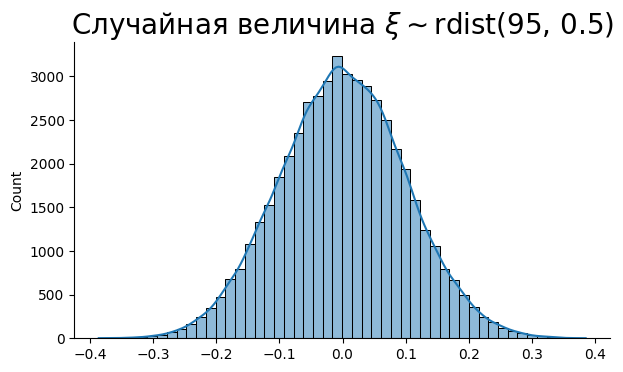

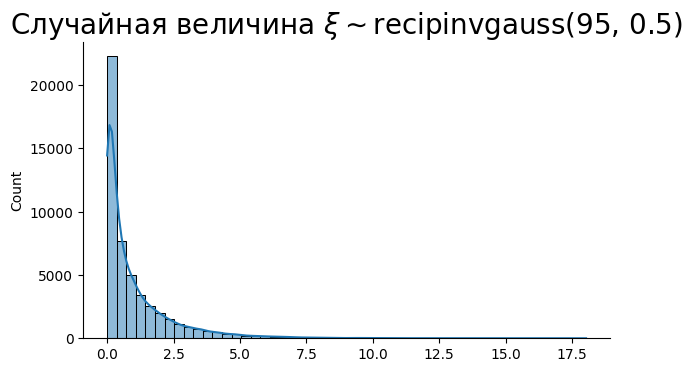

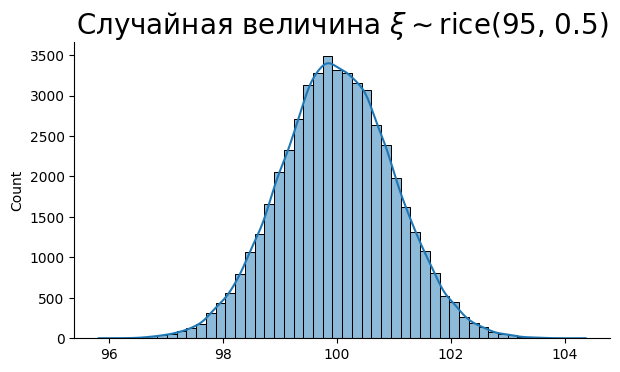

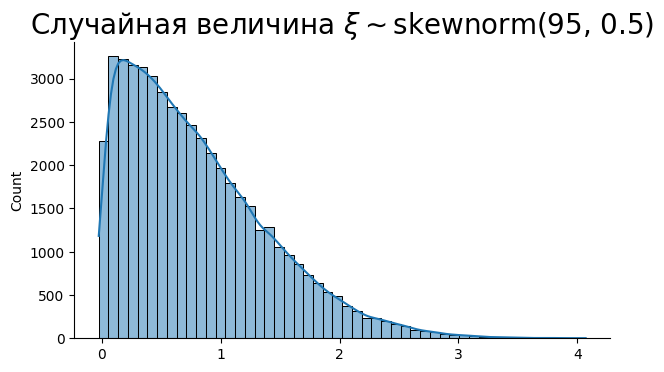

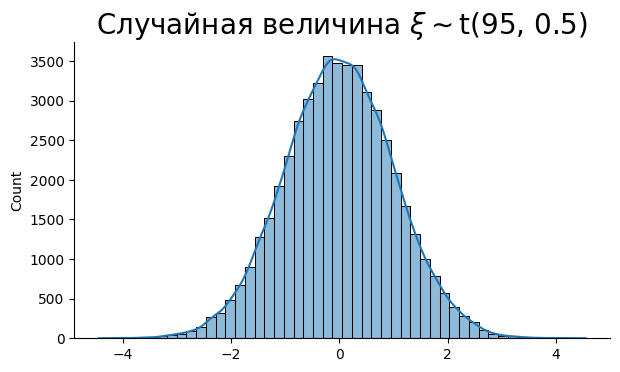

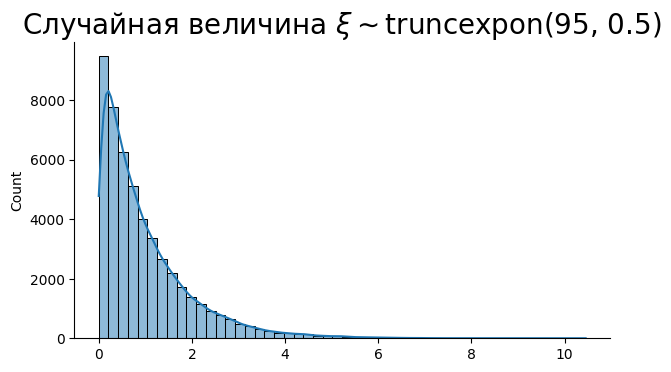

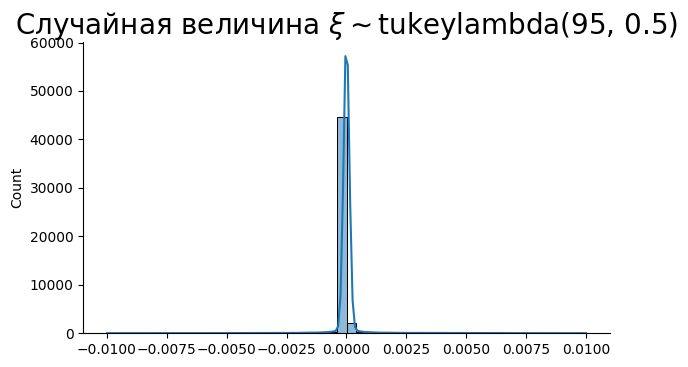

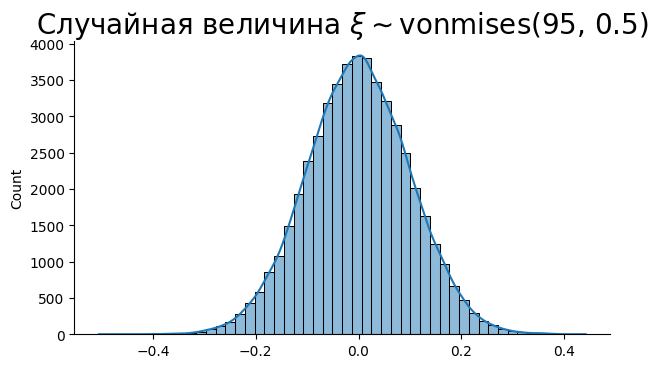

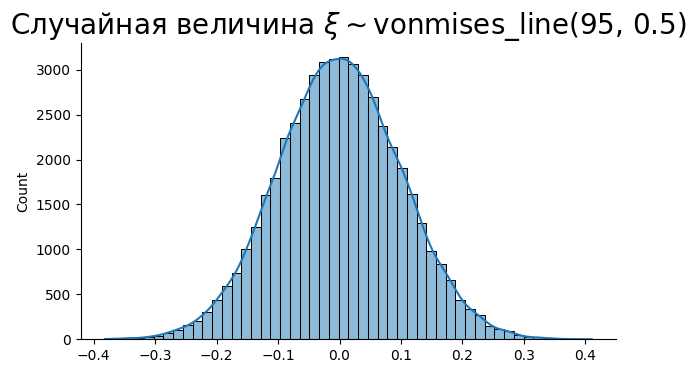

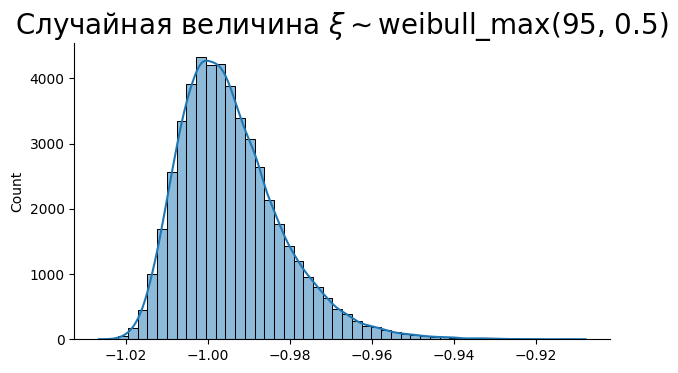

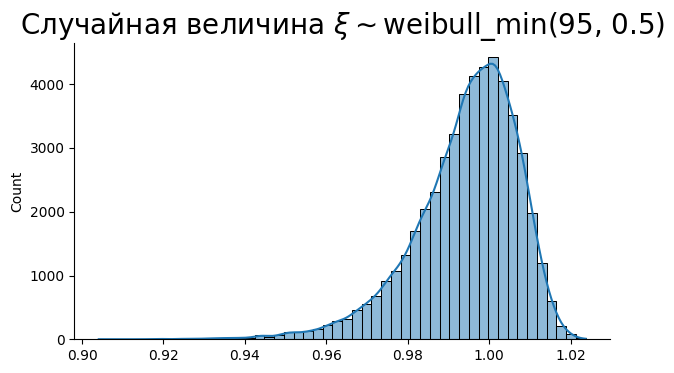

In [18]:
for i in tqdm.tqdm(par_1):
    # print(i)
    try:
        sns.displot(eval('sps.' + i + '.rvs(100, size=50_000)'), bins = 50, height = 3.5, aspect = 1.8, kde = True);
        plt.title(r'Случайная величина $\xi \sim $' + i + '(95, 0.5)', fontsize=20);
    except:
        continue

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.89it/s]


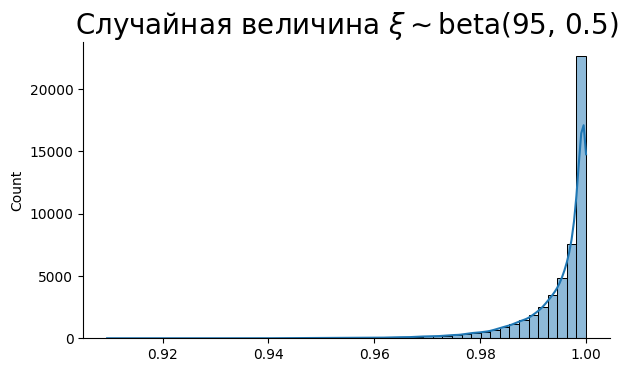

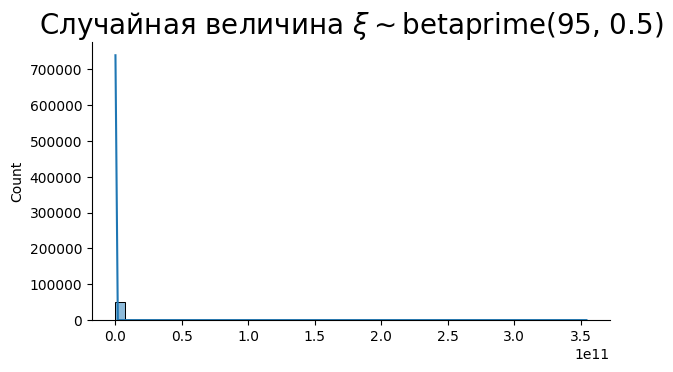

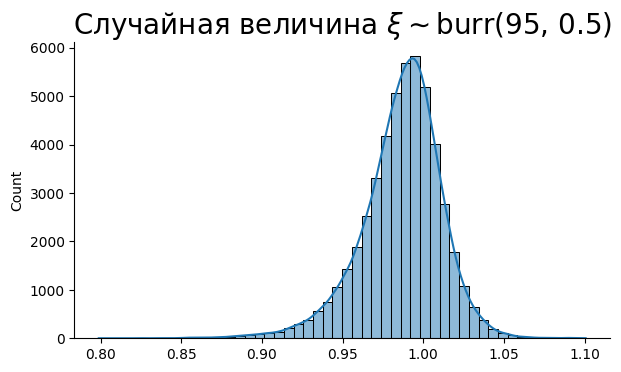

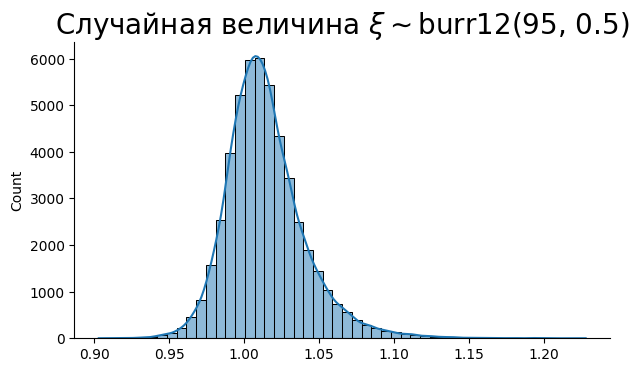

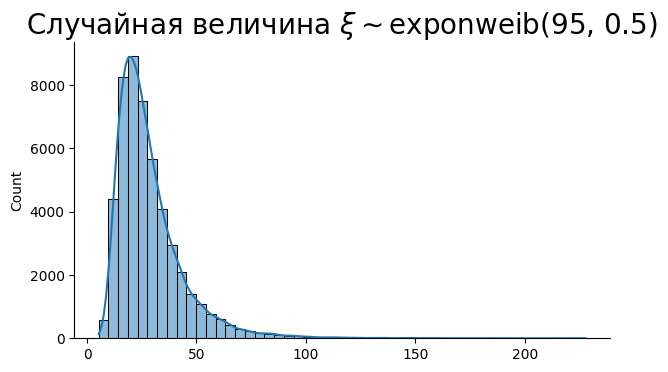

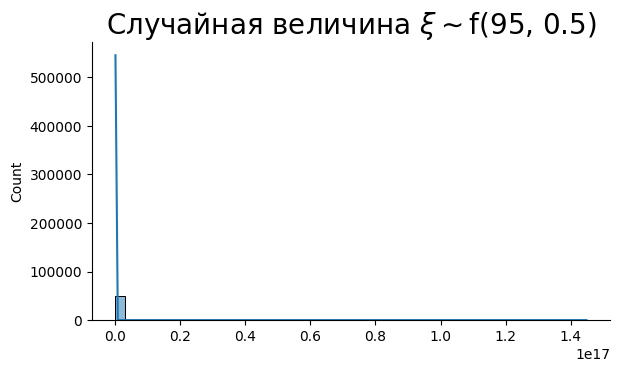

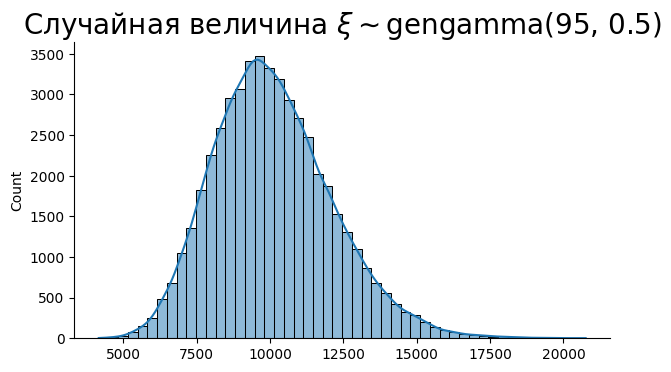

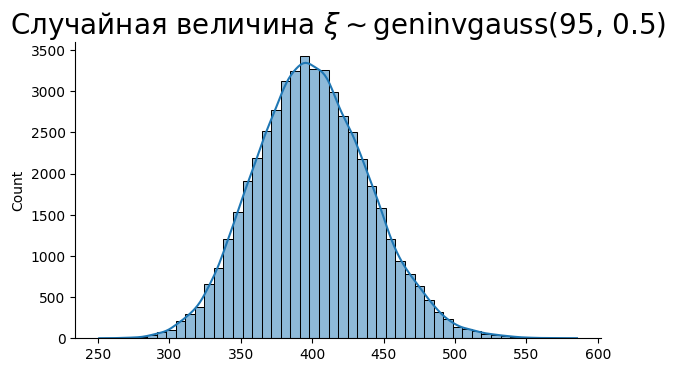

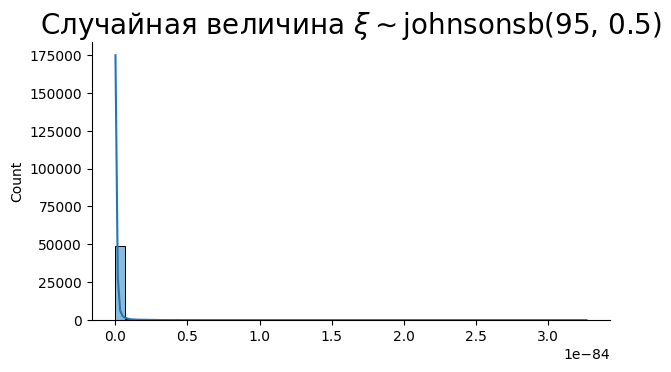

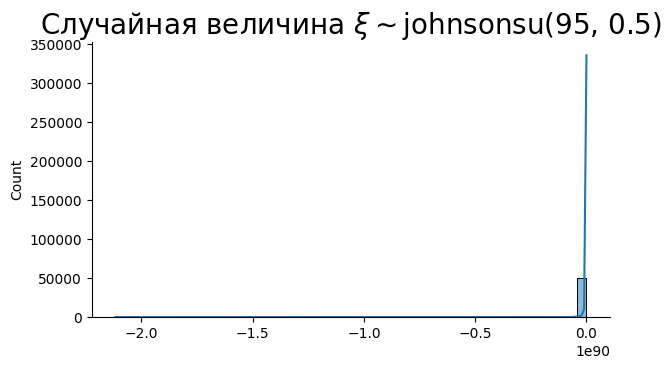

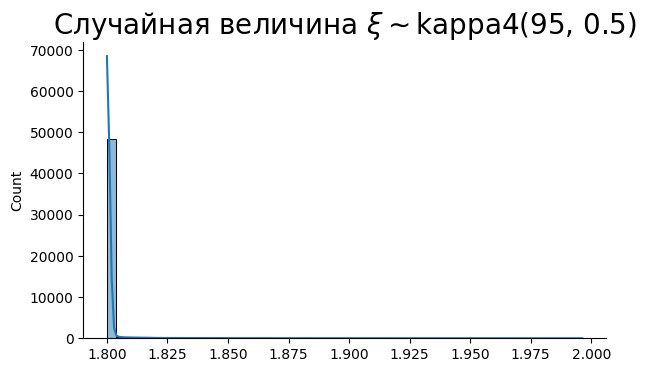

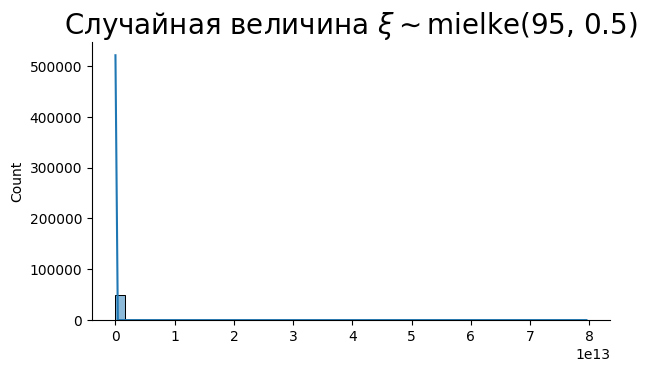

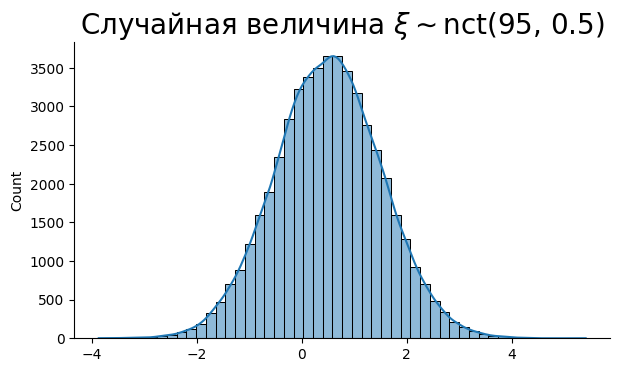

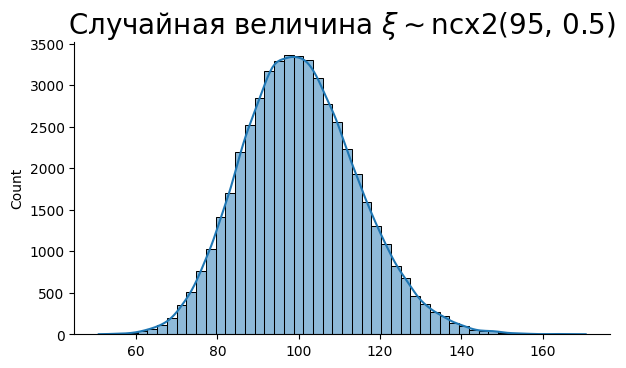

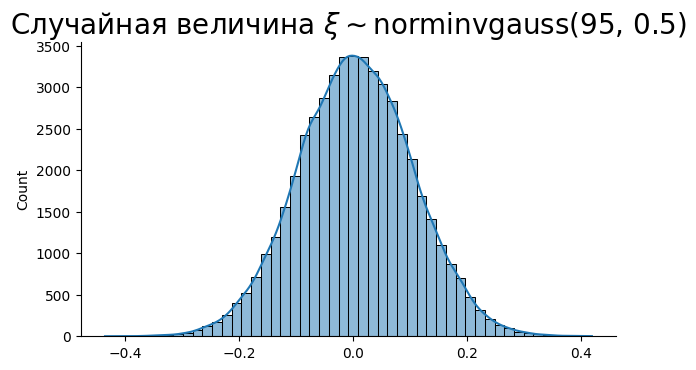

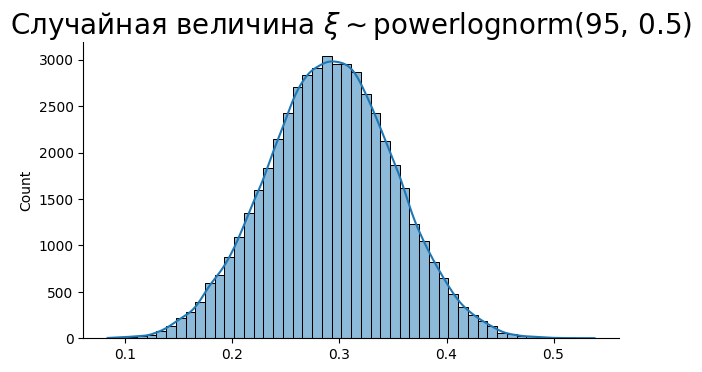

In [20]:
for i in tqdm.tqdm(par_2):
  # print(i)
  try:
      sns.displot(eval('sps.' + i + '.rvs(100, 0.5, size=50_000)'), bins = 50, height = 3.5, aspect = 1.8, kde = True);
      plt.title(r'Случайная величина $\xi \sim $' + i + '(95, 0.5)', fontsize=20);
  except:
    continue